# 4章 顧客の全体像を把握する１０本ノック

引き続き、スポーツジムの会員データを使って顧客の行動を分析していきます。  
３章で顧客の全体像を把握しました。  
ここからは、機械学習を用いて顧客のグループ化や顧客の利用予測行なっていきましょう。  
ここでは、教師なし学習、教師あり学習の回帰を取り扱います。

### ノック31：データを読み込んで確認しよう

In [141]:
# cell の大きさを100％にする
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
df_use_log = pd.read_csv("use_log.csv")
df_customer_join = pd.read_csv("customer_join.csv")

In [12]:
df_customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

In [13]:
df_use_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [11]:
df_use_log.isnull().sum(), df_customer_join.isnull().sum()

(log_id         0
 customer_id    0
 usedate        0
 dtype: int64,
 customer_id             0
 name                    0
 class                   0
 gender                  0
 start_date              0
 end_date             2842
 campaign_id             0
 is_deleted              0
 class_name              0
 price                   0
 campaign_name           0
 mean                    0
 median                  0
 max                     0
 min                     0
 routine_flg             0
 calc_date               0
 membership_period       0
 dtype: int64)

### ノック32：クラスタリングで顧客をグループ化しよう

[sklearn.preprocessing.StandardScaler — scikit-learn 0.24.1 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

${z_i = \large{\frac{x_i- \mu}{\sigma}}}$



+ 非階層的クラスタリング
    + [scikit-learn でクラスタ分析 (K-means 法) – Python でデータサイエンス](https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means)
    + 非階層的クラスタリング (例: K-Means 法) では、決められたクラスタ数にしたがって、近い属性のデータをグループ化します。以下の図では、3つのクラスタに分類しましたが、それぞれの色でどのクラスタに分類されたかを示しています。



In [40]:
df_32 = df_customer_join[['mean', 'median', 'max', 'min',  'membership_period']]
df_32.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [38]:
# K-means 法
# 変数間の距離をベースにグループ化
# グループ化したい数を指定
# 今回は、membership_periodの数値が他のとは違うので標準化する


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

customer_clustering_sc = sc.fit_transform(df_32)
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)


In [43]:
df_32["cluster"] = clusters.labels_
df_32["cluster"].unique()


<ipython-input-43-c742aac49b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_32["cluster"] = clusters.labels_


array([3, 1, 0, 2], dtype=int32)

In [44]:
df_32.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


### ノック33：クラスタリング結果を分析しよう

In [46]:
df_33 = df_32.copy()
df_33.groupby("cluster").count()

,mean,median,max,min,membership_period
cluster,,,,,
0,1336,1336,1336,1336,1336
1,761,761,761,761,761
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [47]:
df_33.groupby("cluster").mean()

,mean,median,max,min,membership_period
cluster,,,,,
0,5.522518,5.373129,8.743263,2.686377,14.831587
1,3.051243,2.885677,4.750329,1.653088,9.269382
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


### ノック34：クラスタリング結果を可視化してみよう

In [49]:
# 次元削除：教師なし学習の一つ。情報をなるべく失わないように変数を削除して、新しい軸を作り出す
# 主成分分析が代表的な手法
# ここでは５つの変数を２つで表現する
 
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X) # 
df_pca = pd.DataFrame(x_pca)
df_pca["cluster"] = df_33["cluster"]
df_pca.head()

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3


<AxesSubplot:xlabel='0', ylabel='1'>

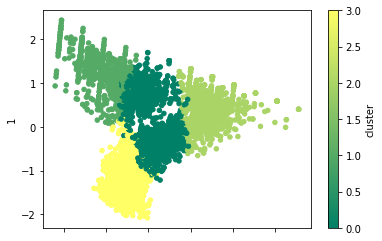

In [59]:
import matplotlib.cm as cm

df_pca.plot.scatter(x=0, y=1,c="cluster",cmap=cm.summer)

### ノック35：クラスタリング結果をもとに退会顧客の傾向を把握しよう

In [60]:
df_35 = pd.concat([df_33, df_customer_join], axis=1)
df_35.head()

,mean,median,max,min,membership_period,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,3,OA832399,XXXX,C01,F,...,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,3,PL270116,XXXXX,C01,M,...,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,3,OA974876,XXXXX,C01,M,...,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,3,HD024127,XXXXX,C01,F,...,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,3,HD661448,XXXXX,C03,F,...,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [68]:
df_35.groupby(["cluster", "is_deleted"])["customer_id"].count()

cluster  is_deleted
0        0              785
         1              551
1        1              761
2        0              827
         1               19
3        0             1230
         1               19
Name: customer_id, dtype: int64

In [71]:
df_35.groupby(["cluster", "routine_flg"])["customer_id"].count()

cluster  routine_flg
0        0               229
         1              1107
1        0               496
         1               265
2        0                52
         1               794
3        0                 2
         1              1247
Name: customer_id, dtype: int64

### ノック36：翌月の利用回数予測を行うためのデータ準備をしよう

In [78]:
df_36 = df_use_log.copy()
df_36["usedate"] = pd.to_datetime(df_36["usedate"])
df_36.set_index("usedate", inplace=True)
df_36_use_bymonth = df_36.groupby("customer_id").resample("M")["customer_id"].count()




In [117]:
df_36_for_pred = df_36_use_bymonth.unstack().T.loc["2018-4":"2018-10"].sort_index(ascending=False).T
df_36_for_pred.rename(columns={d:c for c,d in zip(["count_pred", "count_0", "count_1", "count_2", "count_3", "count_4", "count_5"], 
                                                   df_36_for_pred.columns)}, inplace=True)
df_36_for_pred = df_36_for_pred.dropna()

df_36_for_pred

usedate,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
customer_id,,,,,,,
AS002855,3.0,7.0,3.0,5.0,5.0,5.0,4.0
AS009373,5.0,6.0,6.0,7.0,4.0,4.0,3.0
AS015315,4.0,7.0,3.0,6.0,3.0,3.0,6.0
AS015739,5.0,6.0,5.0,8.0,6.0,5.0,7.0
AS019860,7.0,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...
TS989482,2.0,7.0,6.0,8.0,4.0,7.0,6.0
TS995299,4.0,5.0,7.0,5.0,2.0,7.0,4.0
TS999079,6.0,4.0,3.0,2.0,6.0,5.0,7.0


0       2015-05-01
1       2015-05-01
2       2015-05-01
3       2015-05-01
4       2015-05-01
           ...    
4187    2019-03-14
4188    2019-03-14
4189    2019-03-14
4190    2019-03-14
4191    2019-03-15
Name: start_date, Length: 4192, dtype: object

### ノック37：特徴となる変数を付与しよう

In [142]:
from dateutil import relativedelta

df_37 = df_36_for_pred.merge(df_customer_join[["customer_id", "start_date"]], left_index=True, right_on="customer_id")
df_37["start_date"] = pd.to_datetime(df_37["start_date"])
df_37["period"] = df_37["start_date"].apply(lambda x: (pd.to_datetime("2018-10-1") - x).days//30)
df_37


,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,customer_id,start_date,period
1137,3.0,7.0,3.0,5.0,5.0,5.0,4.0,AS002855,2016-11-01,23
389,5.0,6.0,6.0,7.0,4.0,4.0,3.0,AS009373,2015-11-01,35
174,4.0,7.0,3.0,6.0,3.0,3.0,6.0,AS015315,2015-07-01,39
1791,5.0,6.0,5.0,8.0,6.0,5.0,7.0,AS015739,2017-06-01,16
2185,7.0,5.0,7.0,4.0,6.0,8.0,6.0,AS019860,2017-10-01,12
...,...,...,...,...,...,...,...,...,...,...
2083,2.0,7.0,6.0,8.0,4.0,7.0,6.0,TS989482,2017-09-01,13
260,4.0,5.0,7.0,5.0,2.0,7.0,4.0,TS995299,2015-09-01,37
769,6.0,4.0,3.0,2.0,6.0,5.0,7.0,TS999079,2016-06-01,28
1487,5.0,4.0,3.0,5.0,1.0,4.0,6.0,TS999231,2017-03-01,19


### ノック38：来月の利用回数予測モデルを作成しよう

In [155]:
df_38 = df_37.copy()
df_38 = df_38[df_38["start_date"] >="2018-4-1"]
df_38.sort_values(by="start_date")


,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,customer_id,start_date,period
2828,4.0,7.0,5.0,8.0,6.0,7.0,6.0,IK661529,2018-04-01,6
2817,4.0,1.0,1.0,3.0,6.0,8.0,7.0,PL320453,2018-04-01,6
2827,2.0,3.0,4.0,3.0,6.0,6.0,8.0,IK528327,2018-04-01,6
2818,6.0,3.0,1.0,6.0,7.0,5.0,10.0,AS823436,2018-04-01,6
2826,8.0,9.0,11.0,7.0,8.0,5.0,11.0,PL930272,2018-04-01,6
...,...,...,...,...,...,...,...,...,...,...
2971,3.0,4.0,5.0,3.0,6.0,8.0,8.0,HD104614,2018-04-15,5
2976,3.0,5.0,3.0,7.0,4.0,5.0,9.0,HD069655,2018-04-15,5
2987,2.0,5.0,7.0,7.0,4.0,9.0,8.0,OA710903,2018-04-15,5
2979,8.0,9.0,7.0,6.0,9.0,7.0,11.0,GD716223,2018-04-15,5


In [156]:
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
X = df_38[['count_0', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5', 'period']]
y = df_38['count_pred']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
model.fit(X_train, y_train)


LinearRegression()

In [157]:
model.score(X_train, y_train),model.score(X_test, y_test)

(0.5452246041749533, 0.27100738153944315)

### ノック39：モデルに寄与している変数を確認しよう

In [160]:
df_39 = pd.DataFrame(
    {"feature_names": X.columns, 
    "coefficient": model.coef_}
)
df_39

,feature_names,coefficient
0,count_0,0.630607
1,count_1,-0.028027
2,count_2,0.301753
3,count_3,-0.010755
4,count_4,0.129476
5,count_5,0.014984
6,period,0.768383


### ノック40：来月の利用回数を予測しよう

In [164]:
x1 = [3,4,4,6,8,7,8]
x2 = [2,2,3,3,4,6,8]
x_pred = [x1, x2]
model.predict(x_pred)


array([5.04265908, 3.66572982])